In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train1.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [4]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [6]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [7]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]=X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()]=X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [8]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,35.0
493,71.0,49.5042,71.0
527,NaN,221.7792,25.0


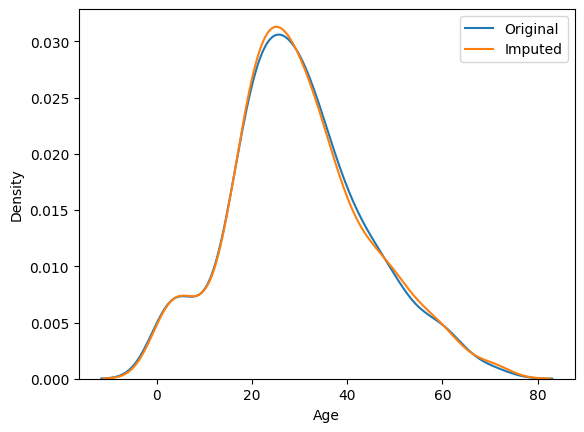

In [9]:
sns.kdeplot(data=X_train['Age'], label='Original', shade=False)
sns.kdeplot(data=X_train['Age_imputed'], label='Imputed', shade=False)

plt.legend()
plt.show()

In [10]:
print('Original varaiance',X_train['Age'].var())
print('Varaince after Imputed',X_train['Age_imputed'].var())

Original varaiance 204.3495133904614
Varaince after Imputed 208.40789133184012


In [11]:
X_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,51.034642
Age,71.512440,204.349513,204.349513
Age_imputed,51.034642,204.349513,208.407891


<Axes: >

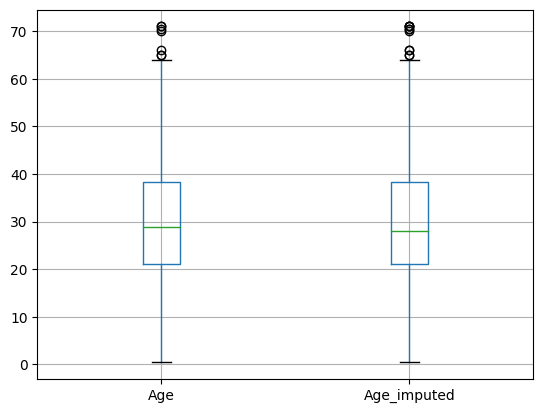

In [12]:
X_train[['Age','Age_imputed']].boxplot()

In [13]:
#sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare'].values))

In [14]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [15]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [16]:
X=data
y=data['SalePrice']
X_train


,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,35.0
493,71.0,49.5042,71.0
527,NaN,221.7792,25.0


In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [18]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [19]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()]=X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()]=X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

In [20]:
temp = pd.concat(
    [
        X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
        X_train['GarageQual_imputed'].value_counts()/len(X_train)
    ],
    axis=1)
                
temp.columns=['original','imputed']      

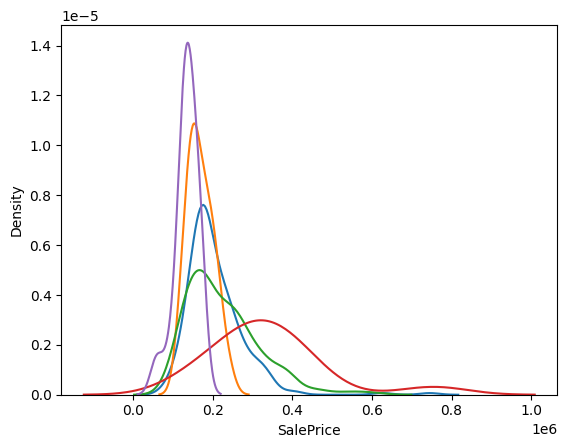

In [21]:
for category in X_train['FireplaceQu'].dropna().unique():sns.distplot(X_train[X_train['FireplaceQu']==category]['SalePrice'],hist=False,label=category)
plt.show()

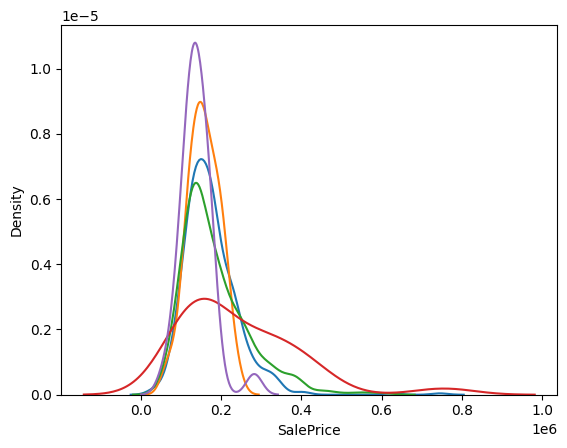

In [22]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():sns.distplot(X_train[X_train['FireplaceQu_imputed']==category]['SalePrice'],hist=False,label=category)
plt.show()